In [64]:
# 引入模块
import matplotlib.pyplot as plt
import numpy as np
from graphviz import Digraph # 同时安装了python-graphviz和graphviz两个包
import random

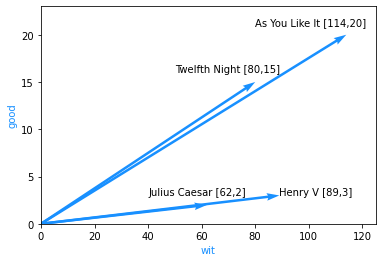

In [48]:
# 术语文档矩阵
fig,ax=plt.subplots()
X=[0,0,0,0]
Y=[0,0,0,0]

U=[114, 80 ,62 ,89]
V=[20, 15, 2 ,3]

ax.quiver(X,Y,U,V,angles='xy', scale_units='xy', scale=1, color="#1890ff")
ax.set_xlim([0, 125])
ax.set_ylim([0, 23])
ax.set_xlabel("wit",color="#1890ff")
ax.set_ylabel("good",color="#1890ff")
ax.set_yticks([0, 5,10,15,20])
plt.text(80,21, "As You Like It [114,20]")
plt.text(50,16, "Twelfth Night [80,15]")
plt.text(40,3, "Julius Caesar [62,2]")
plt.text(89,3, "Henry V [89,3]")
plt.savefig("term-doc-matrix.png",dpi=300)
plt.show()

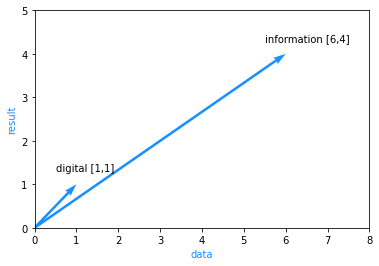

In [56]:
# 术语-上下文矩阵
fig,ax=plt.subplots()
X=[0,0]
Y=[0,0]

U=[1, 6]
V=[1, 4]

ax.quiver(X,Y,U,V,angles='xy', scale_units='xy', scale=1, color="#1890ff")
ax.set_xlim([0, 8])
ax.set_ylim([0, 5])
ax.set_xlabel("data",color="#1890ff")
ax.set_ylabel("result",color="#1890ff")
plt.text(0.5,1.3, "digital [1,1]")
plt.text(5.5,4.3, "information [6,4]")
plt.savefig("term-term-matrix.png",dpi=300)
plt.show()

In [65]:
def neural_graph(inp=3, hide=(10, ), outp=3, inp_label='input', hide_label='hide', outp_label='output', dropout=True, style='h', size='2, 1'):
    """
    绘制简易神经网络图（有向图）
    :param inp: 输入神经元个数
    :param hide: 隐藏层神经元个数, 可迭代数组
    :param outp: 输出神经元个数
    :param inp_label: 输入名称显示
    :param hide_label: 隐藏层名称显示
    :param outp_label: 输出名称显示
    :param dropout: 是否全连接
    :param style: 水平或垂直显示， 可选项为 'h', 'v'
    :param size: 图像显示大小
    :return: 有向图
    """

    dot = Digraph(name='neural network')
    dot.attr(size=size)
    if style == 'v':
        dot.attr(rankdir='LR')

    def draw(enter, exit, label1, label2):
        for i in range(enter):
            for j in range(exit):
                if dropout:
                    if random.randint(0, max(enter, exit)):
                        dot.edge('%s%s' % (label1, i), '%s%s' % (label2, j))
                else:
                    dot.edge('%s%s' % (label1, i), '%s%s' % (label2, j))
    hide = list(hide)
    hide.insert(0, inp)
    hide.append(outp)
    for index, (i, j) in enumerate(zip(hide[:-1], hide[1:])):
        if index == 0:
            draw(i, j, inp_label, hide_label+str(index))
        elif index == len(hide) - 2:
            draw(i, j, hide_label+str(index-1), outp_label)
        else:
            draw(i, j, hide_label+str(index-1), hide_label+str(index))

    return dot

    #其他运行方式
    #return dot.view()

In [132]:
# cbow
dot = Digraph(name="cbow", format="png")
dot.attr(rankdir='LR')
dot.node('1', 'x1',shape="rect")
dot.node('2', 'x2',shape="rect")
dot.node('3', 'xc-1',shape="rect")
dot.node('4', 'xc',shape="rect")
dot.node('5', 'hi',shape="rect")
dot.node('6', 'yj',shape="rect")
dot.edge('1', '5', label="W")
dot.edge('2', '5', label="W")
dot.edge('3', '5', label="W")
dot.edge('4', '5', label="W")
dot.edge('5', '6', label="W'")
dot.view(filename="cbow")

'cbow.png'

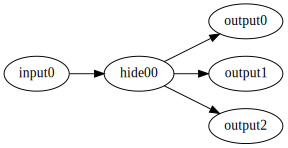

In [116]:
# skip-gram
neural_graph(inp=1,hide=(1,), outp=4, style='v',size='4,16')

In [133]:
# 全连接层
dot = Digraph(name="fc", format="png")
dot.attr(rankdir='LR')
dot.attr(size="100,100!")
dot.node('1', '1')
dot.node('2', '2')
dot.node('3', '3')
dot.node('4', '4')
dot.node('5', '5')
dot.node('6', '6')
dot.node('7', 'a')
dot.node('8', 'b')
dot.node('9', 'c')
dot.node('x', 'd')
dot.edges(['17', '18', '19', '1x','27', '28', '29', '2x','37', '38', '39', '3x','47', '48', '49', '4x'])
dot.view(filename="fc")

'fc.png'

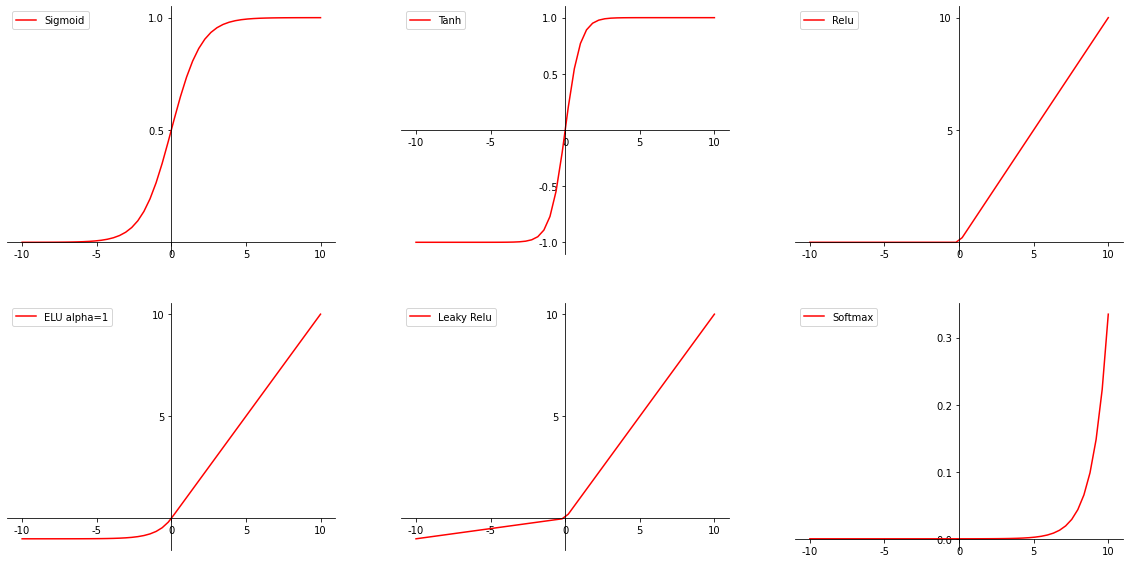

In [162]:
# 激活函数
import math
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
 
 
def sigmoid(x):
    result = 1 / (1 + math.e ** (-x))
    return result
 
 
def tanh(x):
    # result = np.exp(x)-np.exp(-x)/np.exp(x)+np.exp(-x)
    result = (math.e ** (x) - math.e ** (-x)) / (math.e ** (x) + math.e ** (-x))
    return result
 
 
def relu(x):
    result = np.maximum(0, x)
    return result
 
 
def elu(x, alpha=1):
    a = x[x > 0]
    b = alpha * (math.e ** (x[x < 0]) - 1)
    result = np.concatenate((b, a), axis=0)
    return result
 
 
def leaky(x):
    a = x[x > 0]
    b = 0.1 * x[x < 0]
    result = np.concatenate((b, a), axis=0)
    return result

def softmax(a):
    exp_a=np.exp(a)
    sum_exp_a=np.sum(exp_a)
    y=exp_a/sum_exp_a
    return y
 
 
# ===========================================
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(231)
x = np.linspace(-10, 10)
y = sigmoid(x)
 
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.set_xticks([-10, -5, 0, 5, 10])
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))
ax.set_yticks([-1, -0.5, 0.5, 1])
 
plt.plot(x, y, label="Sigmoid", linestyle='-', color='red')
plt.legend()
 
# ============================================
ax = fig.add_subplot(232)
x = np.linspace(-10, 10)
y = tanh(x)
 
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.set_xticks([-10, -5, 0, 5, 10])
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))
ax.set_yticks([-1, -0.5, 0.5, 1])
 
plt.plot(x, y, label="Tanh", linestyle='-', color='red')
plt.legend()
 
# ============================================
ax = fig.add_subplot(233)
x = np.linspace(-10, 10)
y = relu(x)
 
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.set_xticks([-10, -5, 0, 5, 10])
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))
ax.set_yticks([5, 10])
 
plt.plot(x, y, label="Relu", linestyle='-', color='red')
plt.legend()
 
# ============================================
ax = fig.add_subplot(234)
x = np.linspace(-10, 10)
y = elu(x)
 
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.set_xticks([-10, -5, 0, 5, 10])
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))
ax.set_yticks([5, 10])
 
plt.plot(x, y, label="ELU alpha=1", linestyle='-', color='red')
plt.legend()
 
# ============================================
ax = fig.add_subplot(235)
x = np.linspace(-10, 10)
y = leaky(x)
 
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.set_xticks([-10, -5, 0, 5, 10])
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))
ax.set_yticks([5, 10])
 
plt.plot(x, y, label="Leaky Relu", linestyle='-', color='red')
plt.legend()

# ============================================
ax = fig.add_subplot(236)
x = np.linspace(-10, 10)
y = softmax(x)
 
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.set_xticks([-10, -5, 0, 5, 10])
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))
ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5])
 
plt.plot(x, y, label="Softmax", linestyle='-', color='red')
plt.legend()

#========
plt.savefig("activate.png",dpi=300)
plt.show()